In [2]:
ls ..\airflow\plugins\utils

 Volume in drive D is Data
 Volume Serial Number is 60C9-102A

 Directory of D:\Python\udemy_algo_trading_airflow\airflow\plugins\utils

07/04/2022  15:13    <DIR>          .
07/04/2022  15:13    <DIR>          ..
29/03/2022  12:53    <DIR>          __pycache__
27/03/2022  08:56             1,322 db.py
23/02/2022  12:49             1,392 order.py
07/04/2022  15:13               458 strategy.py
29/03/2022  12:53             2,196 tinkoff.py
               4 File(s)          5,368 bytes
               3 Dir(s)  33,540,337,664 bytes free


In [3]:
import sys
sys.path.insert(0, '../airflow/plugins/utils/')

In [4]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [5]:
def _get_db_url(connector:str) -> str:
    return 'user=trader password=income host=localhost port=5432 dbname=stocks'

In [6]:
db._get_db_url = _get_db_url

In [7]:
data = db.get_data_from_table('ads', 'data')

In [8]:
data

,time,open,high,low,close
0,2021-06-01 07:00:00,67.07,67.07,67.07,67.07
1,2021-06-03 07:00:00,67.81,67.81,67.81,67.81
2,2021-06-04 07:00:00,68.29,68.29,68.29,68.29
3,2021-06-09 07:00:00,68.35,68.35,68.35,68.35
4,2021-06-10 07:00:00,68.35,68.36,68.35,68.36
...,...,...,...,...,...
186,2022-03-22 07:00:00,111.00,114.87,108.49,113.97
187,2022-03-23 07:00:00,114.50,122.21,113.95,122.00
188,2022-03-24 07:00:00,121.45,122.59,118.55,120.35
189,2022-03-25 07:00:00,120.75,120.75,115.17,120.50


In [1]:
SMA = 30
DEV=2

In [9]:
data['sma'] = data['close'].rolling(SMA).mean()

In [10]:
std = data['close'].rolling(SMA).std()*DEV

In [18]:
data['lower'] = data['sma'] - std
data['upper'] = data['sma'] + std

<AxesSubplot:title={'center':'Bollinger bands with SMA: 30, and 2 std'}>

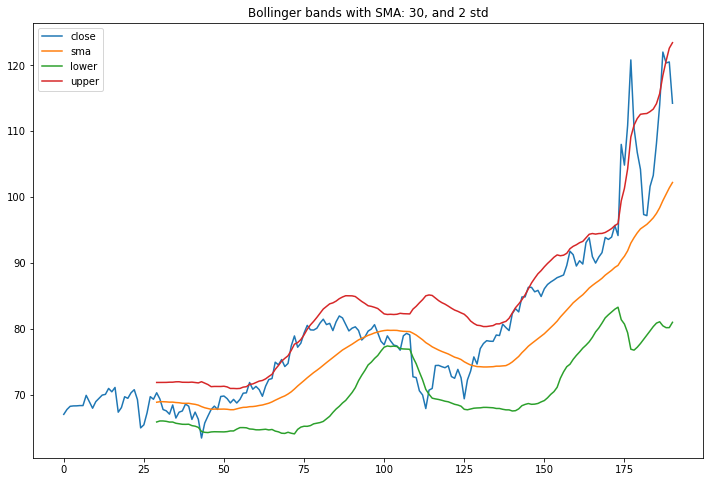

In [19]:
data[['close','sma','lower','upper']].plot(figsize=(12,8), title=f'Bollinger bands with SMA: {SMA}, and {DEV} std')

In [20]:
data['distance'] = data['close'] - data['sma']

In [21]:
data['position'] = np.where(data['close'] < data['lower'],1,np.nan)

In [22]:
data['position'] = np.where(data['close'] > data['upper'], -1, data['position'])

In [23]:
data['position'] = np.where(data['distance'] * data['distance'].shift(1) <0, 0, data['position'])

In [24]:
data['position'] = data['position'].ffill().fillna(0)

In [26]:
data['position'].value_counts()

-1.0    83
 0.0    81
 1.0    27
Name: position, dtype: int64

In [27]:
data.tail(10)

,time,open,high,low,close,sma,lower,upper,distance,position
181,2022-03-15 07:00:00,103.50,103.50,97.30,97.37,95.541667,78.441335,112.641998,1.828333,-1.0
182,2022-03-16 07:00:00,100.23,101.98,96.11,97.20,95.877000,79.066317,112.687683,1.323000,-1.0
183,2022-03-17 07:00:00,97.50,101.87,96.50,101.62,96.349333,79.723147,112.975520,5.270667,-1.0
184,2022-03-18 07:00:00,101.97,106.50,101.97,103.30,96.866000,80.376378,113.355622,6.434000,-1.0
185,2022-03-21 07:00:00,103.33,108.94,103.33,108.16,97.538333,80.902102,114.174565,10.621667,-1.0
186,2022-03-22 07:00:00,111.00,114.87,108.49,113.97,98.397333,81.107914,115.686753,15.572667,-1.0
187,2022-03-23 07:00:00,114.50,122.21,113.95,122.00,99.475667,80.491517,118.459817,22.524333,-1.0
188,2022-03-24 07:00:00,121.45,122.59,118.55,120.35,100.427333,80.212839,120.641828,19.922667,-1.0
189,2022-03-25 07:00:00,120.75,120.75,115.17,120.50,101.401333,80.218012,122.584655,19.098667,-1.0
190,2022-03-28 07:00:00,119.68,119.68,112.82,114.24,102.224000,81.026649,123.421351,12.016000,-1.0
